### Import Statements

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

### Loading the Dataset

In [43]:
uci_data = pd.read_csv('heart_disease_uci.csv')

In [44]:
uci_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#### Dropping irrelevant columns
Now it has 14 columns instead of 16

In [45]:
uci_data.drop(columns=['id', 'dataset'], inplace=True)

In [46]:
uci_data['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [47]:
uci_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#### Changed the binary string values to numeric values

In [60]:
uci_data['sex'] = uci_data['sex'].map({'Male': 1, 'Female': 0})

#### Correlation
High correlations with the target('num') column can be seen with ca(major vessels coolured by fluoroscopy) and oldpeak(ST depression). 
thalach (maximum heart rate) is negatively correlated with age, suggesting that the maximum heart rate generally declines with age.
age also seems to have a better correlation to num
trestbps has a very low correlation with the target, but it has a moderate correlation with age, since bp often increases with age

In [61]:
corr_matrix = uci_data.corr(numeric_only=True)

<Axes: >

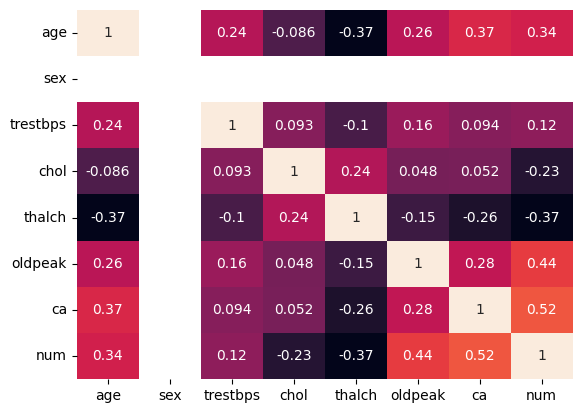

In [62]:
sns.heatmap(corr_matrix, annot=True, cbar=False)

In [53]:
uci_data['sex'] = uci_data['sex'].map({'Male': 1, 'Female': 0})

#### Splitting into train and test data

In [ ]:
X = uci_data.drop('num', axis=1)
y = uci_data['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)